In [5]:
# from superpoint.datasets.utils import photometric_augmentation as daug

import sys
from os.path import dirname
sys.path.append(dirname(r"C:\Data Science\Thesis\ba_keypoints\Superpoint_TF\\"))


from superpoint.datasets.utils import augmentation_legacy as daug
from superpoint.datasets import synthetic_dataset_bg as dset
from utils import plot_imgs
from shapely.geometry import Polygon, LineString

import cv2 as cv
import time
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np

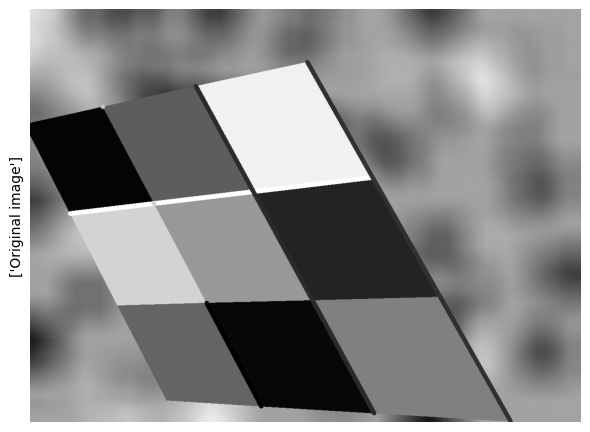

In [6]:
size = (960, 1280)
n_show = 2
# fcts = [daug.additive_gaussian_noise, daug.additive_speckle_noise, daug.change_brightness, daug.change_contrast,
#         daug.affine_transform, daug.perspective_transform, daug.elastic_transform, daug.random_crop, daug.add_shade,
#         daug.motion_blur]
fcts = [daug.additive_gaussian_noise]
img = dset.generate_background(size)
pts = dset.draw_checkerboard(img)
plot_imgs([img], ylabel=["Original image"],  normalize=True, cmap='gray')

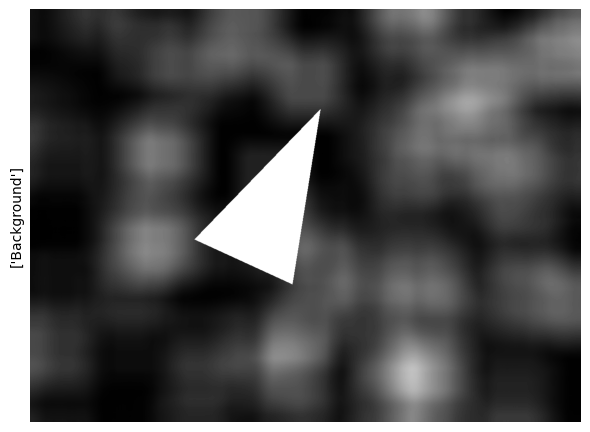

In [7]:
img = dset.generate_background(size)
poly_1= dset.draw_polygon(img)

plot_imgs([img], ylabel=["Background"],  normalize=True, cmap='gray')

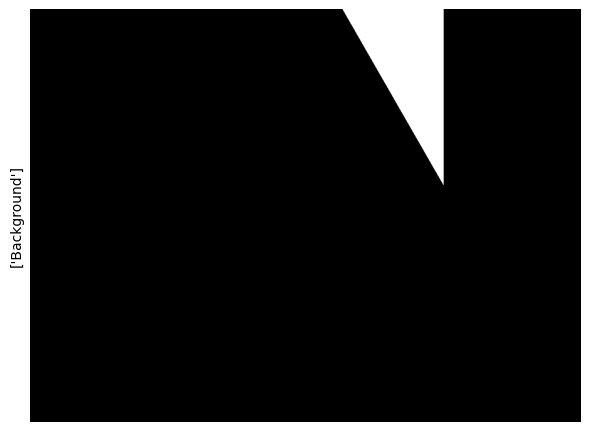

In [8]:
bg= np.zeros(np.array(size))
bg_pts= dset.create_bg_polygon(bg)
plot_imgs([bg], ylabel=["Background"],  normalize=True, cmap='gray')


In [13]:
img = dset.generate_background(size)
poly_1= dset.draw_lines(img, nb_lines=10, bg_poly=bg_pts)
plot_imgs([bg, img], ylabel=["Background"],  normalize=True, cmap='gray')

[[925 149 840 197]]
[[925 149]
 [840 197]]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 2

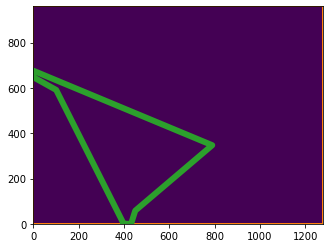

In [217]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon


poly_box=Polygon([[0,0],[0,960],[1280,960],[1280,0]])
poly_box_np=poly_to_np(poly_box)
plt.imshow(bg)
plt.plot(bg_pts[:,0],bg_pts[:,1], lw=4)
# plt.plot(poly_2[:,0],poly_2[:,1], lw=5)
plt.plot(poly_box_np[:,0],poly_box_np[:,1], lw=2)

inter = Polygon(bg_pts).intersection(poly_box)
inter_np = poly_to_np(inter)
plt.plot(inter_np[:,0],inter_np[:,1], lw=6)
plt.xlim(0,size[1])
plt.ylim(0,size[0])
plt.show()

In [218]:
bg=np.zeros(img.shape, np.uint8)
bg_points= dset.create_bg_polygon(bg)
plt.imshow(bg)
plt.plot()

TopologyException: Input geom 0 is invalid: Self-intersection at or near point -986.20389622874723 363.06980113714394 at -986.20389622874723 363.06980113714394


386 543
[3.3464730290619213, 3.536044174378716, 3.571768616306867, 5.7806345500102045, 5.986538039657781]


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x000001EC06762E80>

In [184]:
print(poly_box_np)
print(poly_2)
print(poly_box)

[[   0.    0.]
 [   0.  960.]
 [1280.  960.]
 [1280.    0.]
 [   0.    0.]]
[[ 670 1121]
 [ 497 1190]
 [  11  535]
 [ 389 -408]
 [ 645  -12]
 [ 984  -39]
 [1479  253]]
POLYGON ((0 0, 0 960, 1280 960, 1280 0, 0 0))


In [186]:


p1 = Polygon([(0,0), (1,1), (1,0)])
p2 = Polygon([(0,1), (1,0), (1,1)])
p3 = Polygon(poly_2)




print(p3)
print(p2)
print(p1.intersects(p2))

p4 =np.asarray(p3)
p4



img.shape

POLYGON ((670 1121, 497 1190, 11 535, 389 -408, 645 -12, 984 -39, 1479 253, 670 1121))
POLYGON ((0 1, 1 0, 1 1, 0 1))
True


(960, 1280)

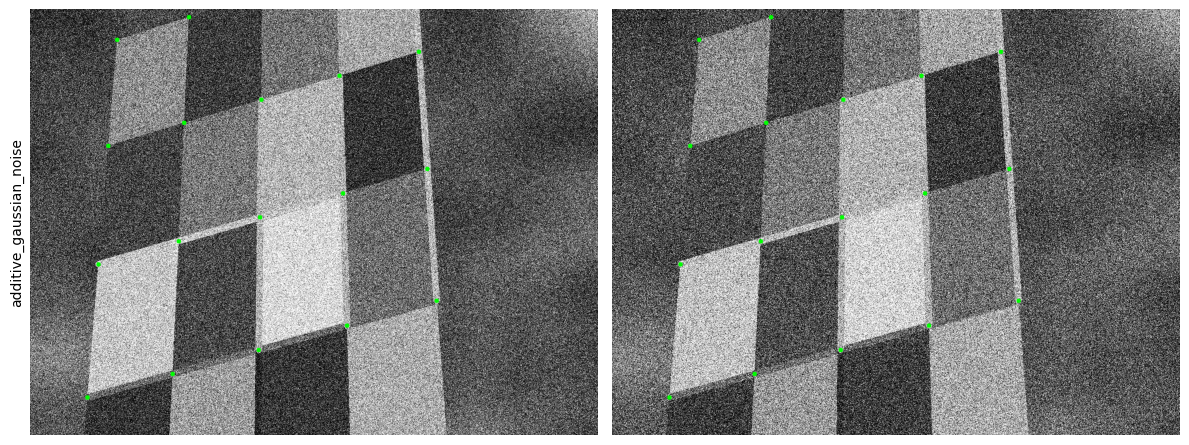

In [42]:

for f in fcts:
    r = []
    for _ in range(n_show):
        (img_distorted, new_pts) = f(img, pts)
        new_pts = new_pts.astype(int)
        img_distorted = dset.draw_interest_points(img_distorted, new_pts)
        r.append(img_distorted.copy())
    plot_imgs(r, ylabel=f.__name__,  normalize=True, cmap='gray')
